#### plot magnitude lightcurve with error bars (i.e. replicate kmt plot)

In [1]:
# import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.optimize as opt
from microlensing import *

# reading pysis.tar.gz; event KMT-2021-BLG-0006, C01_I
file = pd.read_csv("kmtdata.pysis",usecols=['HJD','mag','mag_err'])
df = pd.DataFrame(data=file)

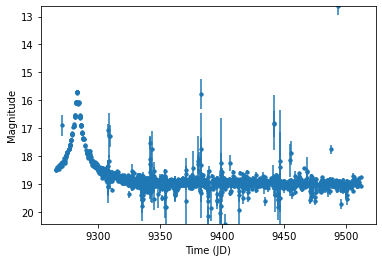

In [2]:
# plot lightcurve of data loaded above
plt.scatter(df.HJD, df.mag, marker='.') #yerr=df.mag_err)
plt.errorbar(df.HJD, df.mag, yerr=df.mag_err, fmt=".")
plt.xlabel('Time (JD)')
plt.ylim([max(df.mag),min(df.mag)])
plt.ylabel('Magnitude')
plt.show()

## plot model using curvefit

In [3]:
# numbers below from or derived using KMTnet data page
t0 = 9282.82792
tE = 26.39
u0 = 0.038
ms = 19.29 # Isource from KMT
m0 = 18.89 # Ibase from KMT
fs = pow(10,((m0-ms)/2.5)) # ms = m0 - 2.5log10(fs) --> fs = 10^((m0-ms)/2.5)

initial = [t0,tE,u0,m0,fs] # array of initial guesses to use in model

t = np.linspace(t0-2*tE,t0+2*tE,num=2541) # time to use in model, +/- 2 cycles of tE

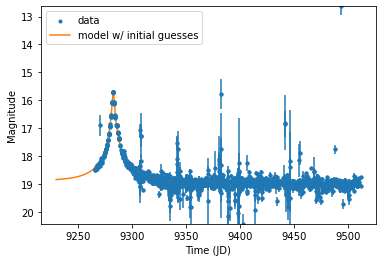

In [4]:
# plot data against model with initial guesses
# plot data:
plt.scatter(df.HJD, df.mag, marker='.', label='data') #yerr=df.mag_err)
plt.errorbar(df.HJD, df.mag, yerr=df.mag_err, fmt=".")
plt.xlabel('Time (JD)')
plt.ylim([max(df.mag),min(df.mag)])
plt.ylabel('Magnitude')

# plot model:
plt.plot(t,m(t,*initial), label='model w/ initial guesses')

plt.legend()
plt.show()

In [5]:
# fit model to data using curvefit with initial guesses, will store best-fit parameters in variable 'popt'
popt,pcov = opt.curve_fit(m,df.HJD,df.mag,p0=initial)
print("best-fit parameters found: ")
print("t0 = {0:.5f}".format(popt[0]))
print("tE = {0:.2f}".format(popt[1]))
print("u0 = {0:.3f}".format(popt[2]))
print("m0 = {0:.2f}".format(popt[3]))
print("fs = {0:.3f}".format(popt[4]))

best-fit parameters found: 
t0 = 9282.86636
tE = 28.15
u0 = 0.036
m0 = 18.98
fs = 0.706


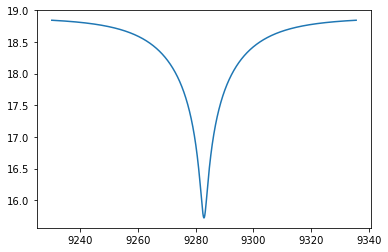

In [6]:
# plot model on its own
plt.plot(t,m(t,t0,tE,u0,m0,fs))

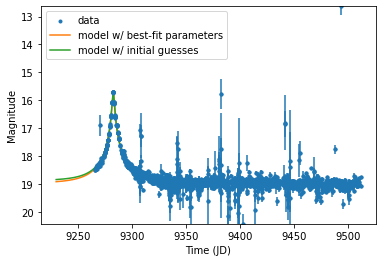

In [7]:
# plot data against model with best-fit parameters
# this plot looks same as plot with initial guesses because the initial guesses are very accurate already

# plot data:
plt.scatter(df.HJD, df.mag, marker='.', label='data') #yerr=df.mag_err)
plt.errorbar(df.HJD, df.mag, yerr=df.mag_err, fmt=".")
plt.xlabel('Time (JD)')
plt.ylim([max(df.mag),min(df.mag)])
plt.ylabel('Magnitude')

# plot model with best-fit parameters:
plt.plot(t,m(t,*popt), label='model w/ best-fit parameters')

# plot model with initial guesses:
plt.plot(t,m(t,*initial), label='model w/ initial guesses')

plt.legend()
plt.show()